<a href="https://colab.research.google.com/github/Edugera/Templates_to_Articles/blob/main/Algorithmic_Trading_Using_Money_Flow_Index(MFI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Descrição: Este programa usa o índice de Fluxo financeiro para determinar quando comprar ou vender ma ação.

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
#import pandas_datareader.data as web
#yf.pdr_override()

     |████████████████████████████████| 5.5MB 11.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=c9e8e08cdf070e5501cbeed08a9d0ce2952378f9d83cad2c5499763ce2c1d4a4
  Stored in directory: /tmp/pip-ephem-wheel-cache-ucuf9bjh/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# Para corrgir o bug: AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'
!pip install git+https://github.com/quantopian/pyfolio

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-emun4xpq
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-emun4xpq
     |████████████████████████████████| 61kB 4.9MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-cp36-none-any.whl size=75764 sha256=51fd212599dead301c28069fa4c1829575a235bfd69ebdda6525f4c323304329
  Stored in directory: /tmp/pip-ephem-wheel-cache-lcauxoah/wheels/62/7d/a7/3e462442ba7d63c35414176627c886340521dc3dbc0893ce9f
  Created wheel for empyrical: filename=empyrical-0.5.5-cp36-none-any.whl size=39765 sha256=9ebc386a818ca3861058ede3bf5125567abed8136dfd20c357064be8ed3dd948
  Stored in directory: /root/.cache/pip/wheels/ea/b2/c8/6769d8444d2f2e608fae2641833110668d0ffd1abeb2e9f3fc
Successfully built pyfolio empyrical


In [ ]:
#tickers = ["ABEV3.SA", "ITSA4.SA", "WEGE3.SA", "USIM5.SA", "VALE3.SA", '^BVSP']
#dados_yahoo = web.get_data_yahoo(tickers, period="5y")["Adj Close"]

tickers = "AAPL"
df = yf.download(tickers=tickers, period="5y")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-21,24.264999,24.469999,23.735001,24.075001,22.304800,208646000
2016-01-22,24.657499,25.365000,24.592501,25.355000,23.490686,263202000
2016-01-25,25.379999,25.382500,24.802500,24.860001,23.032082,207178000
2016-01-26,24.982500,25.219999,24.517500,24.997499,23.159468,300308000
2016-01-27,24.010000,24.157499,23.334999,23.355000,21.637739,533478800
...,...,...,...,...,...,...
2021-01-13,128.759995,131.449997,128.490005,130.889999,130.889999,88636800
2021-01-14,130.800003,131.000000,128.759995,128.910004,128.910004,90221800
2021-01-15,128.779999,130.220001,127.000000,127.139999,127.139999,111598500


In [ ]:
# Imprte as blibliotecas
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [ ]:
# Baixe os dados da ação da APPLE
#from google.colab import files
#files.upload()

In [ ]:
# Pegue os dados
#df = pd.read_csv('AApl.csv')

# Indexe
# df = df.set_index(pd.DatetimeIndex(df['Date'].values))
# df

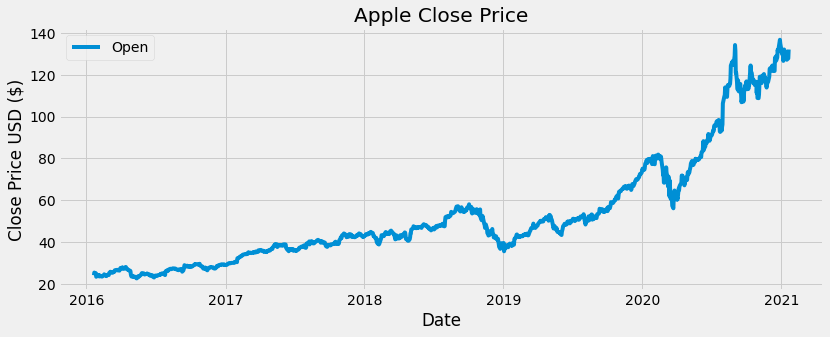

In [ ]:
# Visualize os Dados 
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label = 'Close Price')
plt.title('Apple Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(df.columns.values, loc='upper left')
plt.show()


In [ ]:
# Calcule o preço típico
typical_price = (df['Close'] + df['High'] + df['Low']) / 3
typical_price

Date
2016-01-21     24.093334
2016-01-22     25.104167
2016-01-25     25.015000
2016-01-26     24.911666
2016-01-27     23.615833
                 ...    
2021-01-13    130.276667
2021-01-14    129.556666
2021-01-15    128.120000
2021-01-19    127.826670
2021-01-20    131.023336
Length: 1259, dtype: float64

In [ ]:
# Pegue o período
period = 14

In [ ]:
# Calcule o fluxo de dinheiro
money_flow = typical_price * df['Volume']
money_flow

Date
2016-01-21    5.026978e+09
2016-01-22    6.607467e+09
2016-01-25    5.182558e+09
2016-01-26    7.481173e+09
2016-01-27    1.259855e+10
                  ...     
2021-01-13    1.154731e+10
2021-01-14    1.168884e+10
2021-01-15    1.429800e+10
2021-01-19    1.154229e+10
2021-01-20    1.294117e+10
Length: 1259, dtype: float64

In [ ]:
# Pegue os fluxos de dinheiro positivos e negativos
positive_flow = []
negative_flow = []

# loop through the typical price
for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]:
    positive_flow.append(money_flow[i-1])
    negative_flow.append(0)
  elif typical_price[i] < typical_price[i-1]:
    negative_flow.append(money_flow[i-1])
    positive_flow.append(0)
  else:
    positive_flow.append(0)
    negative_flow.append(0)

In [ ]:
# Pegue todos os fluxos positivos e negativos whitin the time period
positive_mf = []
negative_mf = []

for i in range(period-1, len(positive_flow)):
  positive_mf.append( sum(positive_flow[i + 1 - period : i+1]) )
for i in range(period-1, len(negative_flow)):
  negative_mf.append( sum(negative_flow[i + 1 - period : i+1]) )

In [ ]:
# Calcule o índice do fluxo de dinheiro
mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf) ))
mfi


array([29.71680915, 23.60889759, 30.42270695, ..., 45.69999684,
       40.49191171, 38.8601607 ])

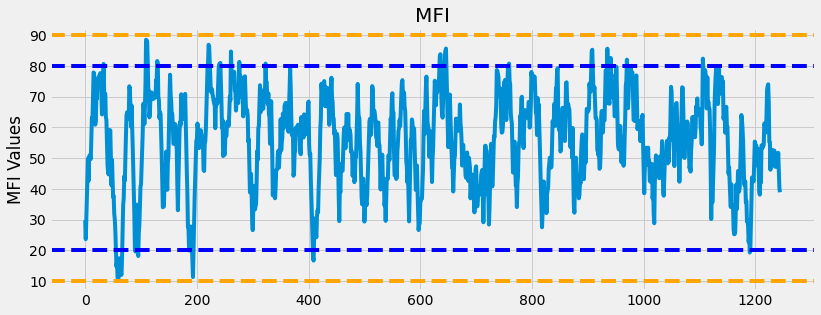

In [ ]:
# Visualize o MFI
df2 = pd.DataFrame()
df2['MFI'] = mfi

# Crie o gráfico
plt.figure(figsize=(12.2, 4.5))
plt.plot(df2['MFI'], label = 'MFI')
plt.axhline(10, linestyle= '--', color = 'orange')
plt.axhline(20, linestyle= '--', color = 'blue')
plt.axhline(80, linestyle= '--', color = 'blue')
plt.axhline(90, linestyle= '--', color = 'orange')
plt.title('MFI')
plt.ylabel('MFI Values')
plt.show()


In [ ]:
# Crie um novo conjunto de dados
new_df = pd.DataFrame()
new_df = df[period:]
new_df['MFI'] = mfi 

In [ ]:
# Mostre o novo cnjunto de dados
new_df

,Open,High,Low,Close,Adj Close,Volume,MFI,Buy,Sell
Date,,,,,,,,,
2016-02-10,23.980000,24.087500,23.525000,23.567499,21.953094,169374400,29.716809,NaN,NaN
2016-02-11,23.447500,23.680000,23.147499,23.424999,21.820358,200298800,23.608898,NaN,NaN
2016-02-12,23.547501,23.625000,23.252501,23.497499,21.887894,161405600,30.422707,NaN,NaN
2016-02-16,23.754999,24.212500,23.652500,24.160000,22.505007,196231600,36.106917,NaN,NaN
2016-02-17,24.167500,24.552500,24.037500,24.530001,22.849665,179452800,44.115661,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-01-13,128.759995,131.449997,128.490005,130.889999,130.889999,88636800,48.984520,NaN,NaN
2021-01-14,130.800003,131.000000,128.759995,128.910004,128.910004,90221800,51.697177,NaN,NaN
2021-01-15,128.779999,130.220001,127.000000,127.139999,127.139999,111598500,45.699997,NaN,NaN


In [ ]:
# Crie uma funçaõ que pegue os sinais de compra e venda
def get_signal(data, High, Low):
  buy_signal = []
  sell_signal = []

  for i in range(len(data['MFI'])):
    if data['MFI'][i] > High:
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['MFI'][i] < Low:
      buy_signal.append(data['Close'][i])
      sell_signal.append(np.nan)
    else:
      sell_signal.append(np.nan)
      buy_signal.append(np.nan)

    return (buy_signal, sell_signal)
  

In [ ]:
# Adicione nova coluna (Compra e Venda)
new_df['Buy'] = pd.Series(get_signal(new_df, 80, 20))
new_df['Sell'] = pd.Series(get_signal(new_df, 80, 20))

# Mostre os dados
new_df



,Open,High,Low,Close,Adj Close,Volume,MFI,Buy,Sell
Date,,,,,,,,,
2016-02-10,23.980000,24.087500,23.525000,23.567499,21.953094,169374400,29.716809,NaN,NaN
2016-02-11,23.447500,23.680000,23.147499,23.424999,21.820358,200298800,23.608898,NaN,NaN
2016-02-12,23.547501,23.625000,23.252501,23.497499,21.887894,161405600,30.422707,NaN,NaN
2016-02-16,23.754999,24.212500,23.652500,24.160000,22.505007,196231600,36.106917,NaN,NaN
2016-02-17,24.167500,24.552500,24.037500,24.530001,22.849665,179452800,44.115661,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-01-13,128.759995,131.449997,128.490005,130.889999,130.889999,88636800,48.984520,NaN,NaN
2021-01-14,130.800003,131.000000,128.759995,128.910004,128.910004,90221800,51.697177,NaN,NaN
2021-01-15,128.779999,130.220001,127.000000,127.139999,127.139999,111598500,45.699997,NaN,NaN


In [ ]:
print(new_df.Buy.cou)

(1245,)


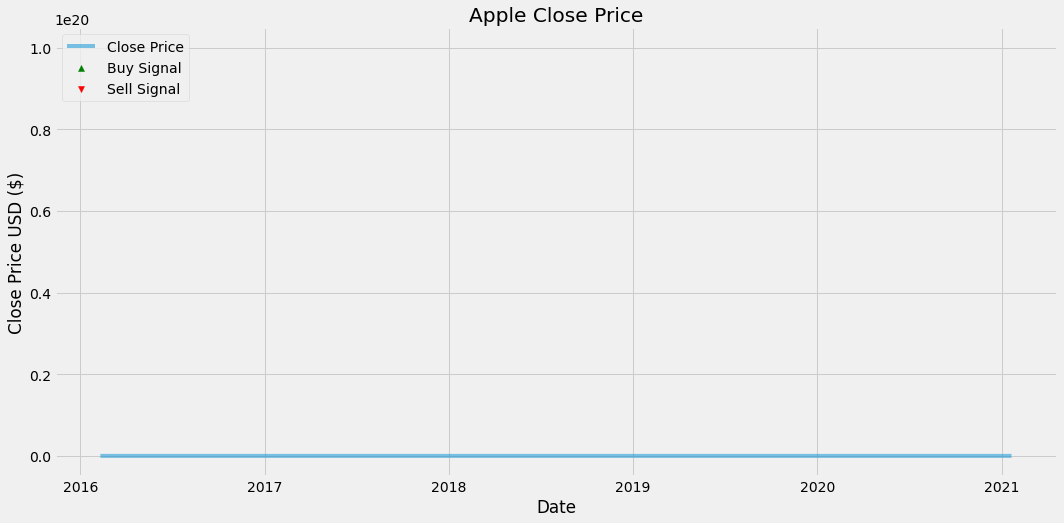

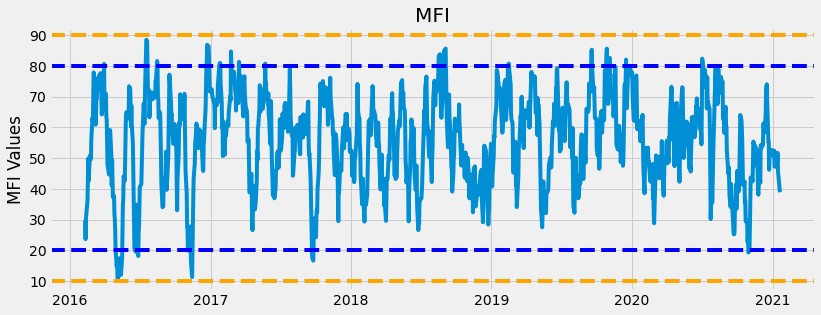

In [ ]:
# Plote os dados
plt.figure(figsize=(16, 7.7))
plt.plot(new_df['Close'], label = 'Close Price', alpha = 0.5)
plt.scatter(new_df.index, new_df['Buy'], color = 'green', label= 'Buy Signal', marker = '^', alpha = 1)
plt.scatter(new_df.index, new_df['Sell'], color = 'red', label= 'Sell Signal', marker = 'v', alpha = 1)
plt.title('Apple Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

# Crie o gráfico
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df['MFI'], label = 'MFI')
plt.axhline(10, linestyle= '--', color = 'orange')
plt.axhline(20, linestyle= '--', color = 'blue')
plt.axhline(80, linestyle= '--', color = 'blue')
plt.axhline(90, linestyle= '--', color = 'orange')
plt.title('MFI')
plt.ylabel('MFI Values')
plt.show()